In [1]:
# SEHS4696 Machine Learning for Data Mining
# Group Project
# Topic: The Average rent of Private Offices in Hong Kong

# author: SEHS4696 MACHINE LEARNING FOR DATA MINING (Group 5)
# Student names and numbers: 22060542S CHAN Ka Lok
#                            22059790S CHEN Yuanhang
#                            22059727S FUNG Ho Wai
#                            22059069S HO Man Kit
#                            22053502S LUI Wing Ho

In [2]:
# reference list
# https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python
# https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting/notebook
# https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt
import pandas as pd
import numpy as np
!pip install pmdarima
import pmdarima as pm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset into a dataframe called myDF
# Refer to Monthly rent per square meter (HKD)
df = pd.read_csv('2.1M.csv', header=1)

#Check the dataset infomation
print(df.head())
print(df.info())
 

    Month Grade A Sheung Wan Grade A Sheung Wan - Remarks  Grade A Central  \
0  Jan-99                247                            X              470   
1  Feb-99                289                            X              424   
2  Mar-99                317                            X              414   
3  Apr-99                265                            X              405   
4  May-99                256                          NaN              403   

  Grade A Central - Remarks  Grade A Wan Chai / Causeway Bay  \
0                       NaN                              337   
1                       NaN                              340   
2                       NaN                              335   
3                       NaN                              300   
4                       NaN                              290   

  Grade A Wan Chai / Causeway Bay - Remarks Grade A North Point / Quarry Bay  \
0                                       NaN                       

In [4]:
# ** 2. Data Preprocessing
# -- 2.1 Drop Unnecessary Features
df.drop('Grade A Sheung Wan - Remarks',axis=1)
df.drop('Grade A Central - Remarks',axis=1,inplace=True)
df.drop('Grade A Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade A North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade A Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade A Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade A Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

df.drop('Grade B Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade B Central - Remarks',axis=1,inplace=True)
df.drop('Grade B Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade B North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade B Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade B Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade B Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

df.drop('Grade C Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade C Central - Remarks',axis=1,inplace=True)
df.drop('Grade C Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade C North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade C Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade C Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade C Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

In [5]:
# Refer to Monthly rent per square meter (HKD)

df = df.set_index('Month')
#df.index = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index, format="%b-%y")
#Declare var col for the choosen column
col = 'Grade A Central'
df = df[[col]]
print(df)

            Grade A Central
Month                      
1999-01-01              470
1999-02-01              424
1999-03-01              414
1999-04-01              405
1999-05-01              403
...                     ...
2023-10-01              986
2023-11-01             1016
2023-12-01              984
2024-01-01              984
2024-02-01             1059

[302 rows x 1 columns]


In [6]:
# -- 2.2 Handle missing data, if any
missing_data = df.isnull().sum()
print(missing_data)


Grade A Central    0
dtype: int64


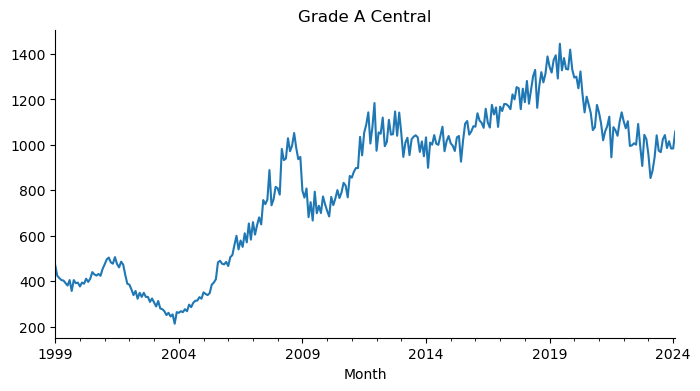

In [7]:
#Times series ( a series of data points recorded at different time intervals)
# A basic graph to show the data
from matplotlib import pyplot as plt
df[col].plot(kind='line', figsize=(8, 4), title=col)
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
#AutoARIMA model
#Seasonal - fit stepwise auto-ARIMA
model = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3653.975, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3312.044, Time=0.65 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3515.172, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3661.878, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3377.577, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3252.506, Time=1.82 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3649.551, Time=2.58 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3195.809, Time=2.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3254.359, Time=1.07 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  302
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1586.057
Date:                            Wed, 01 May 2024   AIC                           3186.113
Time:                                    16:08:25   BIC                           3211.803
Sample:                                01-01-1999   HQIC                          3196.406
                                     - 02-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9161      3.510      0.261      0.794      -5.963       7.795
ar.L1          0.4357      0.058      7.459      0.000       0.321       0.550
ar.L2          0.3268      0.060      5.430      0.000       0.209       0.445
ar.L3          0.2012      0.056      3.602      0.000       0.092       0.311
ar.S.L12      -0.7344      0.057    -12.903      0.000      -0.846      -0.623
ar.S.L24      -0.4418      0.056     -7.830      0.000      -0.552      -0.331
sigma2      3176.7508    229.365     13.850      0.000    2727.203    3626.298
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.52
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               3.08   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

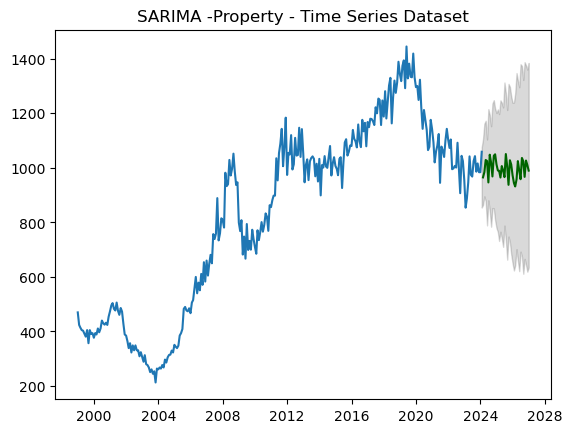

In [9]:
# Forecast
n_periods = 36
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA -Property - Time Series Dataset")
plt.show()

In [10]:
# Linear Regression
from sklearn.model_selection import train_test_split
#df['Grade A Central'] = df.target

X = df.index.month
y = df['Grade A Central']
X = np.array(X).reshape(-1, 1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42 )
print(x_train)
print(Y_train)

[[ 1]
 [11]
 [ 5]
 [ 4]
 [ 9]
 [12]
 [10]
 [ 7]
 [10]
 [ 7]
 [11]
 [ 7]
 [ 9]
 [ 3]
 [ 7]
 [11]
 [ 6]
 [ 6]
 [ 3]
 [ 9]
 [ 5]
 [ 1]
 [ 7]
 [ 6]
 [12]
 [11]
 [ 8]
 [12]
 [ 8]
 [ 1]
 [ 5]
 [ 1]
 [ 4]
 [11]
 [ 8]
 [12]
 [ 2]
 [ 9]
 [ 2]
 [ 2]
 [ 5]
 [ 7]
 [ 3]
 [ 9]
 [ 8]
 [ 1]
 [10]
 [ 8]
 [11]
 [11]
 [ 3]
 [ 7]
 [ 7]
 [ 6]
 [ 1]
 [ 4]
 [ 5]
 [ 3]
 [ 2]
 [ 1]
 [ 3]
 [12]
 [ 3]
 [ 7]
 [ 8]
 [ 8]
 [ 7]
 [10]
 [ 7]
 [10]
 [ 3]
 [12]
 [ 6]
 [ 9]
 [ 5]
 [ 5]
 [10]
 [ 4]
 [10]
 [10]
 [ 1]
 [ 3]
 [ 3]
 [ 8]
 [ 4]
 [ 2]
 [ 1]
 [12]
 [11]
 [ 8]
 [ 3]
 [ 6]
 [12]
 [ 9]
 [12]
 [ 2]
 [ 5]
 [ 2]
 [ 3]
 [ 6]
 [ 6]
 [12]
 [ 2]
 [ 3]
 [ 4]
 [ 1]
 [12]
 [ 5]
 [11]
 [ 4]
 [12]
 [11]
 [ 4]
 [12]
 [10]
 [10]
 [ 6]
 [ 6]
 [ 7]
 [ 5]
 [ 3]
 [ 8]
 [10]
 [11]
 [ 1]
 [10]
 [11]
 [ 5]
 [10]
 [ 8]
 [ 4]
 [ 3]
 [ 1]
 [ 2]
 [ 7]
 [ 1]
 [ 6]
 [ 8]
 [12]
 [11]
 [ 9]
 [ 6]
 [ 4]
 [ 9]
 [ 5]
 [ 3]
 [ 9]
 [ 6]
 [ 7]
 [10]
 [ 8]
 [ 7]
 [ 3]
 [ 4]
 [ 9]
 [ 5]
 [ 9]
 [11]
 [ 3]
 [ 5]
 [ 9]
 [ 1]
 [ 1]
 [ 5]
 [ 4]
 [ 2]
 [ 1

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train,Y_train)

# Predicting rent for the test set
Y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 116273.12480159749
R-squared: -0.008681547371115927
Coefficients: [5.47236305]
Intercept: 790.7812425885261
